# Assignment 3 Neural Networks
    Name: Gokul Nithin Kumar Rajakumar
    Student ID: 801082252

# I. Overview 
    In this assignment, the objective is to understand Neural Netowrks concepts for classification of the data. I have done a few reading part for this assignment related to Neural Networks. I have used temperature dataset for Non Linear Regression and Accident Dataset for Nonlinear Logistic Regression for which I have given a brief description about them below.


# II. Data
    This dataset is all about predicting temperature forecasting. The Data is recorded for aver a period of seven years at Max Planck Institute for Biogeochemistry in Jena, Germany from 2009-2016.
    
    In this dataset there are 15 different features such as 
    i. air temperature
    ii. atmospheric pressure
    iii. humidity
    iv. wind direction 
    etc... 
        that were recorded every 10 minutes, over a period of seven years from 2009–2016.
    

# Reading the Data

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset using pandas
df = pd.read_csv("D:\\UNCC\\Sem 2\\Machine Learning\\Assignment 3\\ML Regression\\jena_climate_2009_2016.csv")
df.head()

Date Time  p (mbar)   T (K)  Tpot (K)  Tdew (K)  rh (%)  \
0  01.01.2009 00:10:00    996.52  265.13    265.40    264.25    93.3   
1  01.01.2009 00:20:00    996.57  264.74    265.01    263.87    93.4   
2  01.01.2009 00:30:00    996.53  264.64    264.91    263.84    93.9   
3  01.01.2009 00:40:00    996.51  264.84    265.12    264.08    94.2   
4  01.01.2009 00:50:00    996.51  264.88    265.15    264.11    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3

# Data Preprocessing

In [3]:
#to first get to know the information about all the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420531 entries, 0 to 420530
Data columns (total 15 columns):
Date Time          420531 non-null object
p (mbar)           420531 non-null float64
T (K)              420531 non-null float64
Tpot (K)           420531 non-null float64
Tdew (K)           420531 non-null float64
rh (%)             420531 non-null float64
VPmax (mbar)       420531 non-null float64
VPact (mbar)       420531 non-null float64
VPdef (mbar)       420531 non-null float64
sh (g/kg)          420531 non-null float64
H2OC (mmol/mol)    420531 non-null float64
rho (g/m**3)       420531 non-null float64
wv (m/s)           420531 non-null float64
max. wv (m/s)      420531 non-null float64
wd (deg)           420531 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [4]:
#To check if there are any null values in the dataset
df.isna().any()

Date Time          False
p (mbar)           False
T (K)              False
Tpot (K)           False
Tdew (K)           False
rh (%)             False
VPmax (mbar)       False
VPact (mbar)       False
VPdef (mbar)       False
sh (g/kg)          False
H2OC (mmol/mol)    False
rho (g/m**3)       False
wv (m/s)           False
max. wv (m/s)      False
wd (deg)           False
dtype: bool

## Observation
    Since all are FALSE, there are no samples with null values in them.

In [5]:
# Converting Date and Time to General Format so that they can be used efficiently
df['Date Time']= pd.to_datetime(df['Date Time'])
df['Date Time'].head()

0   2009-01-01 00:10:00
1   2009-01-01 00:20:00
2   2009-01-01 00:30:00
3   2009-01-01 00:40:00
4   2009-01-01 00:50:00
Name: Date Time, dtype: datetime64[ns]

In [6]:
#After converting date and time to general format extracting useful information from them like seperating day, 
#month and year and storing them in new columns


df['dom'] = df['Date Time'].dt.day
df['Weekday'] = df['Date Time'].dt.weekday
df['hour'] = df['Date Time'].dt.hour
df['month'] = df['Date Time'].dt.month
df['year'] = df['Date Time'].dt.year

df.head()

Date Time  p (mbar)   T (K)  Tpot (K)  Tdew (K)  rh (%)  \
0 2009-01-01 00:10:00    996.52  265.13    265.40    264.25    93.3   
1 2009-01-01 00:20:00    996.57  264.74    265.01    263.87    93.4   
2 2009-01-01 00:30:00    996.53  264.64    264.91    263.84    93.9   
3 2009-01-01 00:40:00    996.51  264.84    265.12    264.08    94.2   
4 2009-01-01 00:50:00    996.51  264.88    265.15    264.11    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  dom  Weekday  hour  month  \
0       1307.75      1.03           1.75     152.3    1        3     0      1   
1       1309.80      0.72           1.50     136.1    1        3     0      1   
2       1310.24      0.19           0.63     171.6    1        3     0      1   
3       1309.19      0.34           0.50     198.0    1        3     0      1   
4       1309.00      0.32           0.63     214.3    1        3     0      1   

   year  
0  2009  
1  2009  
2  2009  
3  2009  
4  2009

## Observation
    Here we have formatted the date and time attribute and extracted new columns such as day, weekday,hour,month,year.

In [7]:
#to describe the entire dataset and to give the overall view of it.
df.describe()

p (mbar)          T (K)       Tpot (K)       Tdew (K)  \
count  420531.000000  420531.000000  420531.000000  420531.000000   
mean      989.212729     282.599734     283.492333     278.105489   
std         8.358677       8.423351       8.504464       6.730626   
min       913.600000     250.140000     250.600000     248.140000   
25%       984.200000     276.510000     277.430000     273.390000   
50%       989.580000     282.560000     283.460000     278.360000   
75%       994.720000     288.620000     289.530000     283.220000   
max      1015.350000     310.430000     311.340000     296.260000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420531.000000  420531.000000  420531.000000  420531.000000   
mean       76.008531      13.575903       9.533513       4.042308   
std        16.476500       7.739038       4.184115       4.896939   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.210000       7.780000       6.210000       0.870000   
50%        79.300000      11.820000       8.860000       2.190000   
75%        89.400000      17.600000      12.350000       5.300000   
max       100.000000      63.770000      28.320000      46.010000   

           sh (g/kg)  H2OC (mmol/mol)   rho (g/m**3)      wv (m/s)  \
count  420531.000000    420531.000000  420531.000000  420531.00000   
mean        6.022255         9.639978    1216.064581       2.13021   
std         2.656109         4.235346      39.975272       1.54176   
min         0.500000         0.800000    1059.450000       0.00000   
25%         3.920000         6.290000    1187.490000       0.99000   
50%         5.590000         8.960000    1213.790000       1.76000   
75%         7.800000        12.480000    1242.770000       2.86000   
max        18.130000        28.820000    1393.540000      14.63000   

       max. wv (m/s)       wd (deg)            dom        Weekday  \
count  420531.000000  420531.000000  420531.000000  420531.000000   
mean        3.532242     174.735147      15.715495       3.002088   
std         2.340411      86.674735       8.796558       1.999574   
min         0.000000       0.000000       1.000000       0.000000   
25%         1.760000     124.900000       8.000000       1.000000   
50%         2.960000     198.100000      16.000000       3.000000   
75%         4.740000     234.100000      23.000000       5.000000   
max        23.500000     360.000000      31.000000       6.000000   

                hour          month           year  
count  420531.000000  420531.000000  420531.000000  
mean       11.500432       6.515241    2012.496693  
std         6.921875       3.449904       2.289749  
min         0.000000       1.000000    2009.000000  
25%         6.000000       4.000000    2010.000000  
50%        12.000000       7.000000    2012.000000  
75%        17.000000      10.000000    2014.000000  
max        23.000000      12.000000    2017.000000

# Visualization of the Data

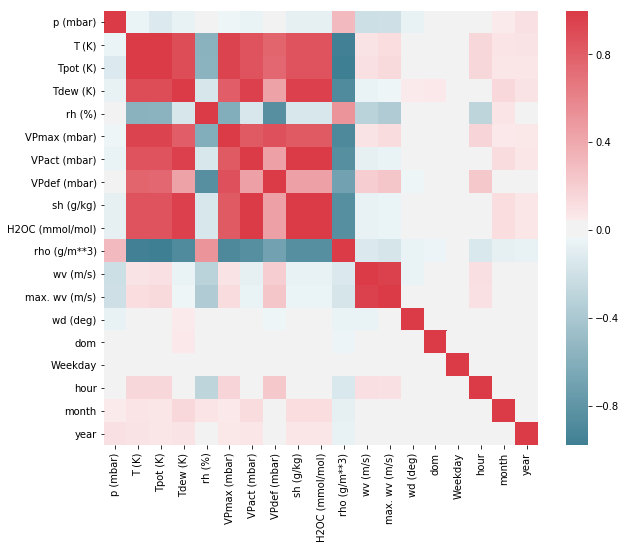

In [8]:
#creating a heat map for the entire dataset to depict the relation and association between the features.
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

## Observation
    This graph describes in detail the relation and association between the attributes the values ranges from -1 to 1 ie. 
    -1 being highly not related and 1 being hightly related.

In [9]:
#Now for visualizing the forecast for each day during December 2009 we must first filter the samples
df_filtered_by_month = df.query('month==12 and year==2009')
df_filtered_by_month

Date Time  p (mbar)   T (K)  Tpot (K)  Tdew (K)  rh (%)  \
1583  2009-12-01 00:00:00   1003.34  264.19    263.95    262.58    88.0   
1584  2009-12-01 00:10:00   1003.25  264.28    264.04    262.56    87.2   
1585  2009-12-01 00:20:00   1003.21  264.20    263.97    262.36    86.4   
1586  2009-12-01 00:30:00   1003.10  264.00    263.78    262.19    86.6   
1587  2009-12-01 00:40:00   1003.01  264.01    263.79    262.27    87.1   
1588  2009-12-01 00:50:00   1002.86  264.33    264.12    262.59    87.1   
1589  2009-12-01 01:00:00   1002.67  264.35    264.16    262.48    86.2   
1590  2009-12-01 01:10:00   1002.64  264.47    264.28    262.63    86.4   
1591  2009-12-01 01:20:00   1002.64  264.55    264.36    262.60    85.7   
1592  2009-12-01 01:30:00   1002.52  264.60    264.42    262.67    85.8   
1593  2009-12-01 01:40:00   1002.35  264.66    264.49    262.73    85.8   
1594  2009-12-01 01:50:00   1002.27  264.78    264.62    262.83    85.7   
1595  2009-12-01 02:00:00   1002.25  264.86    264.70    262.86    85.4   
1596  2009-12-01 02:10:00   1002.21  264.84    264.68    262.79    85.0   
1597  2009-12-01 02:20:00   1002.16  264.55    264.40    262.50    85.0   
1598  2009-12-01 02:30:00   1002.21  264.34    264.18    262.40    85.7   
1599  2009-12-01 02:40:00   1002.22  264.34    264.18    262.43    85.9   
1600  2009-12-01 02:50:00   1002.19  264.29    264.13    262.38    85.9   
1601  2009-12-01 03:00:00   1002.10  264.40    264.25    262.54    86.3   
1602  2009-12-01 03:10:00   1002.01  264.39    264.25    262.50    86.1   
1603  2009-12-01 03:20:00   1001.95  264.15    264.01    262.31    86.4   
1604  2009-12-01 03:30:00   1001.92  263.97    263.84    262.19    86.8   
1605  2009-12-01 03:40:00   1001.90  263.67    263.54    261.94    87.1   
1606  2009-12-01 03:50:00   1001.89  263.50    263.37    261.89    87.9   
1607  2009-12-01 04:00:00   1001.83  263.55    263.42    261.98    88.2   
1608  2009-12-01 04:10:00   1001.78  263.59    263.47    261.97    87.9   
1609  2009-12-01 04:20:00   1001.67  263.50    263.38    261.86    87.7   
1610  2009-12-01 04:30:00   1001.55  263.40    263.29    261.75    87.6   
1611  2009-12-01 04:40:00   1001.54  263.17    263.06    261.48    87.3   
1612  2009-12-01 04:50:00   1001.50  263.02    262.92    261.40    87.8   
...                   ...       ...     ...       ...       ...     ...   
52527 2009-12-31 19:00:00    966.67  272.05    274.72    271.90    98.9   
52528 2009-12-31 19:10:00    966.63  272.03    274.70    271.88    98.9   
52529 2009-12-31 19:20:00    966.65  272.04    274.70    271.89    98.9   
52530 2009-12-31 19:30:00    966.63  272.05    274.72    271.90    98.9   
52531 2009-12-31 19:40:00    966.54  272.03    274.70    271.87    98.8   
52532 2009-12-31 19:50:00    966.53  271.93    274.60    271.75    98.7   
52533 2009-12-31 20:00:00    966.41  271.91    274.60    271.74    98.7   
52534 2009-12-31 20:10:00    966.48  271.89    274.57    271.72    98.7   
52535 2009-12-31 20:20:00    966.63  271.81    274.47    271.62    98.6   
52536 2009-12-31 20:30:00    966.71  271.79    274.44    271.61    98.7   
52537 2009-12-31 20:40:00    966.83  271.74    274.39    271.55    98.6   
52538 2009-12-31 20:50:00    966.97  271.72    274.35    271.53    98.6   
52539 2009-12-31 21:00:00    966.91  271.66    274.30    271.47    98.6   
52540 2009-12-31 21:10:00    967.02  271.61    274.24    271.40    98.5   
52541 2009-12-31 21:20:00    967.02  271.50    274.13    271.29    98.4   
52542 2009-12-31 21:30:00    967.09  271.40    274.03    271.17    98.3   
52543 2009-12-31 21:40:00    967.14  271.26    273.87    271.02    98.2   
52544 2009-12-31 21:50:00    967.24  271.17    273.77    270.92    98.2   
52545 2009-12-31 22:00:00    967.27  271.00    273.60    270.73    98.0   
52546 2009-12-31 22:10:00    967.26  270.89    273.50    270.61    97.9   
52547 2009-12-31 22:20:00    967.26  270.79    273.39    270.49    97.8   
52548 2009-12-31 22:30:00    967.25  270.

[Text(0,0.5,'Temperature (K)'), Text(0.5,0,'Day')]

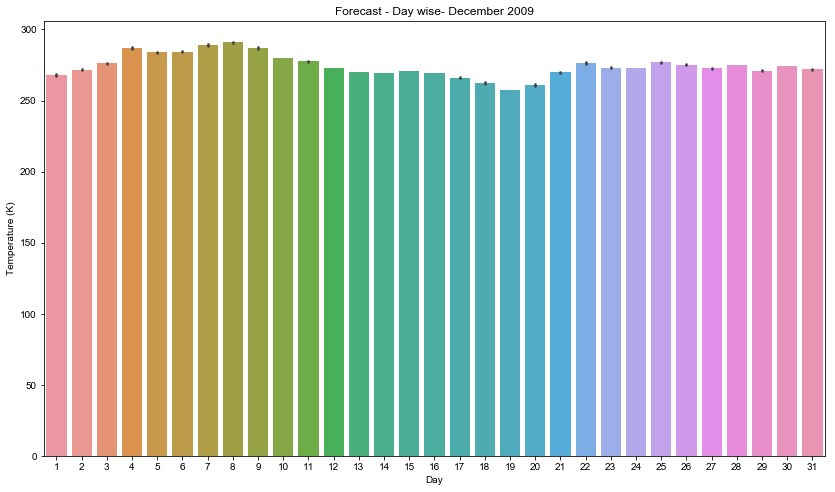

In [10]:
#Now plotting a graph for  Day vs Temperature
plt.figure(figsize=(14,8))
plt.title('Forecast - Day wise- December 2009')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="dom", y="T (K)", data=df_filtered_by_month)
fig.set(xlabel='Day', ylabel='Temperature (K)')

## Observation
    Here if we see the temperature has gradually dropped after December mid showing the starting of WINTER and 
    has reached as low as -15 deg celsius.
    

In [11]:
#Now for visualizing the forecast for each month during the year 2009 we must first filter the samples

df_filtered_by_year = df.query('year==2009')
df_filtered_by_year

Date Time  p (mbar)   T (K)  Tpot (K)  Tdew (K)  rh (%)  \
0     2009-01-01 00:10:00    996.52  265.13    265.40    264.25    93.3   
1     2009-01-01 00:20:00    996.57  264.74    265.01    263.87    93.4   
2     2009-01-01 00:30:00    996.53  264.64    264.91    263.84    93.9   
3     2009-01-01 00:40:00    996.51  264.84    265.12    264.08    94.2   
4     2009-01-01 00:50:00    996.51  264.88    265.15    264.11    94.1   
5     2009-01-01 01:00:00    996.50  265.10    265.38    264.37    94.4   
6     2009-01-01 01:10:00    996.50  265.53    265.81    264.85    94.8   
7     2009-01-01 01:20:00    996.50  265.53    265.81    264.79    94.4   
8     2009-01-01 01:30:00    996.50  265.24    265.52    264.42    93.8   
9     2009-01-01 01:40:00    996.53  264.72    264.99    263.81    93.1   
10    2009-01-01 01:50:00    996.62  264.39    264.66    263.49    93.1   
11    2009-01-01 02:00:00    996.62  264.27    264.54    263.38    93.2   
12    2009-01-01 02:10:00    996.63  264.30    264.57    263.45    93.5   
13    2009-01-01 02:20:00    996.74  264.32    264.58    263.47    93.5   
14    2009-01-01 02:30:00    996.81  264.49    264.74    263.69    93.9   
15    2009-01-01 02:40:00    996.81  264.49    264.74    263.65    93.6   
16    2009-01-01 02:50:00    996.86  264.45    264.70    263.60    93.5   
17    2009-01-01 03:00:00    996.84  264.34    264.59    263.49    93.5   
18    2009-01-01 03:10:00    996.87  264.31    264.56    263.46    93.5   
19    2009-01-01 03:20:00    996.97  264.21    264.45    263.33    93.3   
20    2009-01-01 03:30:00    997.08  264.21    264.44    263.35    93.4   
21    2009-01-01 03:40:00    997.10  264.29    264.52    263.39    93.1   
22    2009-01-01 03:50:00    997.06  264.16    264.39    263.16    92.4   
23    2009-01-01 04:00:00    996.99  264.10    264.34    263.13    92.6   
24    2009-01-01 04:10:00    997.05  263.92    264.15    262.90    92.2   
25    2009-01-01 04:20:00    997.11  263.66    263.89    262.61    92.0   
26    2009-01-01 04:30:00    997.19  263.65    263.87    262.64    92.3   
27    2009-01-01 04:40:00    997.24  263.80    264.02    262.86    92.8   
28    2009-01-01 04:50:00    997.37  263.68    263.89    262.69    92.4   
29    2009-01-01 05:00:00    997.46  263.52    263.72    262.50    92.2   
...                   ...       ...     ...       ...       ...     ...   
52527 2009-12-31 19:00:00    966.67  272.05    274.72    271.90    98.9   
52528 2009-12-31 19:10:00    966.63  272.03    274.70    271.88    98.9   
52529 2009-12-31 19:20:00    966.65  272.04    274.70    271.89    98.9   
52530 2009-12-31 19:30:00    966.63  272.05    274.72    271.90    98.9   
52531 2009-12-31 19:40:00    966.54  272.03    274.70    271.87    98.8   
52532 2009-12-31 19:50:00    966.53  271.93    274.60    271.75    98.7   
52533 2009-12-31 20:00:00    966.41  271.91    274.60    271.74    98.7   
52534 2009-12-31 20:10:00    966.48  271.89    274.57    271.72    98.7   
52535 2009-12-31 20:20:00    966.63  271.81    274.47    271.62    98.6   
52536 2009-12-31 20:30:00    966.71  271.79    274.44    271.61    98.7   
52537 2009-12-31 20:40:00    966.83  271.74    274.39    271.55    98.6   
52538 2009-12-31 20:50:00    966.97  271.72    274.35    271.53    98.6   
52539 2009-12-31 21:00:00    966.91  271.66    274.30    271.47    98.6   
52540 2009-12-31 21:10:00    967.02  271.61    274.24    271.40    98.5   
52541 2009-12-31 21:20:00    967.02  271.50    274.13    271.29    98.4   
52542 2009-12-31 21:30:00    967.09  271.40    274.03    271.17    98.3   
52543 2009-12-31 21:40:00    967.14  271.26    273.87    271.02    98.2   
52544 2009-12-31 21:50:00    967.24  271.17    273.77    270.92    98.2   
52545 2009-12-31 22:00:00    967.27  271.00    273.60    270.73    98.0   
52546 2009-12-31 22:10:00    967.26  270.89    273.50    270.61    97.9   
52547 2009-12-31 22:20:00    967.26  270.79    273.39    270.49    97.8   
52548 2009-12-31 22:30:00    967.25  270.

[Text(0,0.5,'Temperature (K)'), Text(0.5,0,'Month')]

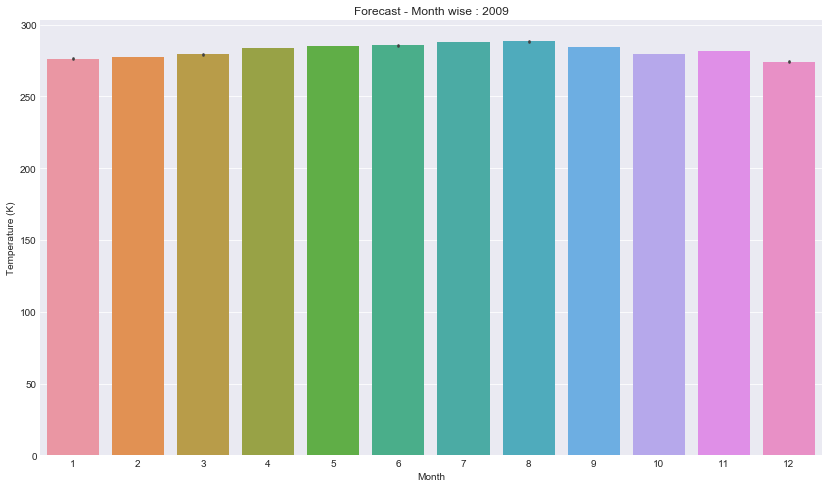

In [12]:
#Now plotting a graph for  Month vs Temperature
plt.figure(figsize=(14,8))
plt.title('Forecast - Month wise : 2009')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="month", y="T (K)", data=df_filtered_by_year)
fig.set(xlabel='Month', ylabel='Temperature (K)')

## Observation
    Here if we see August has recorder the highest temperature and December being the least. We could also see the uncertainity in the temperature drop between October and November.

In [13]:
#Now for visualizing the forecast for every hour on 12/01/2009 we must first filter the samples

df_filtered_by_hour = df.query('dom==1 and month==12 and year==2009')
df_filtered_by_hour.head()

Date Time  p (mbar)   T (K)  Tpot (K)  Tdew (K)  rh (%)  \
1583 2009-12-01 00:00:00   1003.34  264.19    263.95    262.58    88.0   
1584 2009-12-01 00:10:00   1003.25  264.28    264.04    262.56    87.2   
1585 2009-12-01 00:20:00   1003.21  264.20    263.97    262.36    86.4   
1586 2009-12-01 00:30:00   1003.10  264.00    263.78    262.19    86.6   
1587 2009-12-01 00:40:00   1003.01  264.01    263.79    262.27    87.1   

      VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
1583          3.10          2.72          0.37       1.69             2.72   
1584          3.12          2.72          0.40       1.69             2.71   
1585          3.10          2.68          0.42       1.66             2.67   
1586          3.05          2.64          0.41       1.64             2.63   
1587          3.05          2.66          0.39       1.65             2.65   

      rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  dom  Weekday  hour  \
1583       1321.60      2.71           4.38     174.0    1        1     0   
1584       1321.03      2.88           4.25     181.6    1        1     0   
1585       1321.40      3.05           4.38     181.3    1        1     0   
1586       1322.27      3.24           4.38     176.5    1        1     0   
1587       1322.09      3.00           4.63     175.2    1        1     0   

      month  year  
1583     12  2009  
1584     12  2009  
1585     12  2009  
1586     12  2009  
1587     12  2009

## Observation
    Here if we see August has recorder the highest temperature and December being the least. We could also see the uncertainity in the temperature drop between October and November.

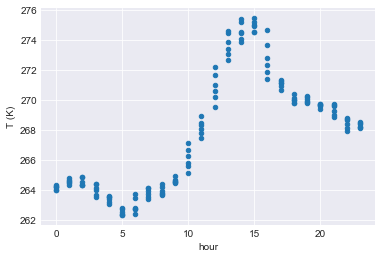

In [14]:
# plotting a scatter plot between Hour vs Temperature  

df_filtered_by_hour.plot(kind="scatter", x="hour", y="T (K)", alpha=1)
plt.show()

## Observation
    The temperature difference is actually expected as usual being high temperature during afternoon and low temperatures during night.

# Partitioning
    The dataset is partitioned the dataset in the ratio 20:80, providing 20% to testing data and the rest 80% to training data. 

In [15]:
df = df.loc[:, ~df.columns.isin(['Date Time','dom','Weekday','hour','month','year'])]

X2 = df.iloc[:,df.columns != 'T (K)']

T = df.iloc[:,df.columns == 'T (K)']

X2 = X2.values
T = T.values

In [17]:
# now partition the data 

def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  
    for k, r in enumerate(ratio):
        nrows = int(round(N * r)) 
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [18]:
Xlst, Tlst = partition(pd.DataFrame(X2), pd.DataFrame(T))

Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ytrain, Ytest = [tt.as_matrix() for tt in Tlst]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [19]:
Xtrain.shape

(336425, 13)

In [20]:
Ytrain.shape

(336425, 1)

In [21]:
Xtest.shape

(84106, 13)

In [22]:
Ytest.shape

(84106, 1)

# Introduction to Neural Networks
   Neural networks, or artificial neural networks, are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions (as shown in the figure), we build or stack multiple neuron-like hidden units to map data into nonlinear space for rich representation.4 
   <img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/perceptron.png" width=600 />
      
   A Non-Linear classification model is a model that is defined by a Classification model which is further defined by linear classification boundary.  Neural neworks are typically organized in layers.Layers are made up of a number of interconnected 'nodes' which contain an 'activation function'. It is because of the activation function in the nodes of the neural network that makes the whole model non-linear. A nonlinear activation function allows nonlinear classification. The actual processing is done via a system of weighted connections between the layers. The hidden layers are finally connected to the output layer where we receive the output.

     Advantages of Neural Networks:
        1. Noisy data is not a problem.
        2. Neural networks makes approximately good solution which is far more sufficient rather than expecting for perfect solutions which is not required.
        3. Better the training datas, the better are your results.


# Nonlinear Regression
    This NeuralNet class is the main class to implement Non linear Regression. 
    
    The NeuralNet variable is "nunits": the number of inputs, hidden units, and outputs

        Methods
            1. __init__: update/initiate weights
            2. forward: forward processing of neural network
            3. backward: back-propagation of neural network
            4. train: train the neural network
            5. use: appply the trained network for prediction
            6. pack: pack multiple weights of each layer into one vector

        Attributes
            1. _nLayers: the number of hidden unit layers 
            2. rho: learning rate
            3. _W: weights
            4. _weights: weights in one dimension (_W is referencing _weight)
            5. stdX: standardization class for data
            6. stdT: standardization class for target

In [23]:
# standardization class
class Standardizer: 
    
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

In [24]:
from nn import NeuralNet
from grad import scg, steepest
from copy import copy


class NeuralNet:

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [25]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

nnet = NeuralNet([13,3,1])
nnet.train(Xtrain,Ytrain,ftracep=True)


{'w': array([-1.32847452e-01,  9.29344020e-02, -1.01974073e-01, -8.35772617e-02,
         7.71830452e-02, -8.88793190e-02,  1.98364712e-01,  1.06436764e+00,
        -1.04617241e+00, -7.63301457e-03,  9.21642817e-01, -9.12851540e-01,
         1.25687273e-03, -6.53582972e-01,  6.02275634e-01,  4.85579857e-02,
         9.87513565e-01, -9.23164366e-01,  3.17836412e-01,  8.25178787e-01,
        -8.69598093e-01, -7.53303536e-02,  7.51963093e-01, -8.40931198e-01,
        -2.31041532e-01,  7.63620435e-01, -7.26603608e-01, -1.32691915e-01,
         8.55417284e-01, -8.08215767e-01,  3.59653191e-01, -1.01430891e+00,
         9.90781230e-01, -1.92288671e-04,  7.32691316e-02, -7.22136180e-02,
         2.57001797e-05,  1.19006250e-01, -1.18818322e-01, -7.41766135e-05,
        -2.45957369e-03, -1.77463960e-05, -6.62629872e-01, -5.21980426e+00,
         4.04932803e-01,  4.09443731e-01]),
 'f': 3.240433239463136e-05,
 'reason': 'limit on f Precision',
 'wtrace': None,
 'ftrace': [0.49942598317772124,
 

In [26]:
Y = nnet.use(Xtest)
Ytest, Z = nnet.use(Xtest, retZ=True)

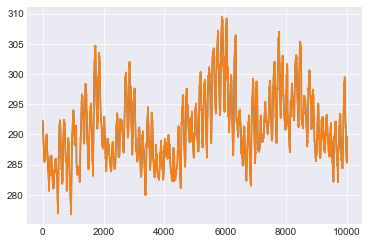

In [27]:
#Plotiing actual and predicted value
plt.plot(Ytest[:10000])
plt.plot(Y[:10000])

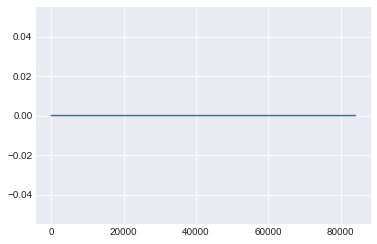

In [28]:
# error plot
err = nnet._errorf(Ytest,Y)
plt.plot(err)

D:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  warnings.warn(message, mplDeprecation, stacklevel=1)


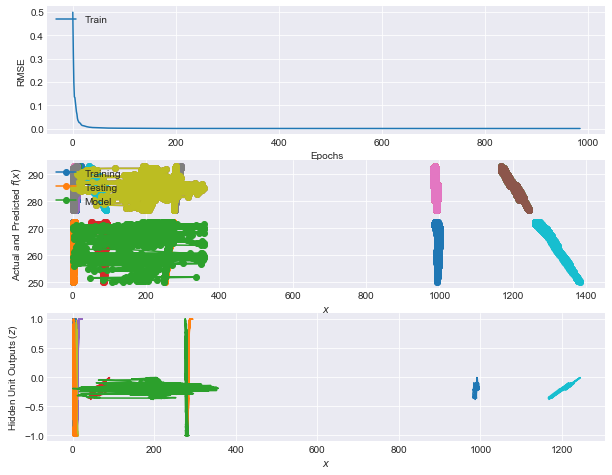

In [29]:

plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(nnet.ftrace)

plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(3,1,2)
plt.plot(Xtrain[:1000],Ytrain[:1000],'o-',Xtest[:1000],Ytest[:1000],'o-',Xtest[:1000],Ytest[:1000],'o-')

plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')

plt.subplot(3,1,3)
plt.plot(Xtest[:1000], Z[1][:1000])

plt.xlabel('$x$')
plt.ylabel('Hidden Unit Outputs ($z$)');

# K-Fold Cross Validation
    It generates K (training, validation) pairs from the items in X. Each pair is a partition of X, where validation is an iterable of length len(X)/K. So each training iterable is of length (K-1)*len(X)/K. If randomise is true, a copy of X is shuffled before partitioning, otherwise its order is preserved in training and validation.

In [30]:
def k_fold_cross_validation(X, K, randomise = False):
   
    if randomise: from random import shuffle; X=list(X); shuffle(X)
    for k in range(K):
        training = [X for i, X in enumerate(X) if i % K != k]
        validation = [X for i, X in enumerate(X) if i % K == k]
        yield training, validation

X = [i for i in range(97)]
for training, validation in k_fold_cross_validation(X, K=7):
    for x in X: assert (x in training) ^ (x in validation), x

In [95]:
from sklearn import preprocessing

def fold_i_of_k(df, i, k):
    n = len(df)
    return len(df[n*(i-1)//k:n*i//k])


#Constants
FOLD_I = 1
FOLD_K =5

#Creating 5 folds
counter = 1
s=0
total_ac = 0
while counter!=FOLD_K+1:
    fold = fold_i_of_k(df,counter,5)
    d_fold = df[s:s + fold]
    d_test = d_fold
    X_test = d_test.iloc[:,0:7]
    y_test = d_test.iloc[:,7:8]
    d_train = df.drop(df.index[s:s+fold])
    X_train = d_train.iloc[:,0:7]
    y_train = d_train.iloc[:,7:8]
    X_train = X_train.as_matrix()
    X_train = preprocessing.scale(X_train)
    y_train = y_train.as_matrix()
    X_test = X_test.as_matrix()
    X_test = preprocessing.scale(X_test)
    y_test = y_test.as_matrix()

    from numpy import array
    y_train = array(y_train)
    nn1 = NeuralNet([13,3,1])
    nn1.use(X_train,y_train)
    ac = k*100
    total_ac = total_ac + ac
    s = s + fold 
    counter= counter+1

total_ac = total_ac / FOLD_K
print("Cross validation accuracy is: ",total_ac,"%")

Cross validation accuracy is:  44.58413926499033 %


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# IIIc Non Linear Logistic Regression

## Introduction about the dataset
    This dataset is all about predicting the number of accidents that happened during the period in the city of barcelona. It also incorporates the number of mild and serious injuries, the number of vehicles that were resposible for the accident and the point of impact.
    
    In this dataset there are 15 different features such as
        i. ID
        ii. District Name
        iii. Neighborhood Name
        iv. Street
        v. Weekday
        vi. Month
        vii. Day
        etc....  

In [48]:
#reading the dataset using pandas
df = pd.read_csv("D:\\UNCC\\Sem 2\\Machine Learning\\Assignment 3\\ML Classification\\accidents_2017.csv")
df.head()

Id District Name           Neighborhood Name  \
0  2017S008429           Unknown                     Unknown   
1  2017S007316           Unknown                     Unknown   
2  2017S010210           Unknown                     Unknown   
3  2017S006364           Unknown                     Unknown   
4  2017S004615        Sant Martí  el Camp de l'Arpa del Clot   

                                              Street   Weekday      Month  \
0  Número 27                                     ...    Friday    October   
1  Número 3 Zona Franca / Número 50 Zona Franca  ...    Friday  September   
2  Litoral (Besòs)                               ...    Friday   December   
3  Número 3 Zona Franca                          ...    Friday       July   
4  Las Navas de Tolosa                           ...  Thursday        May   

   Day  Hour Part of the day  Mild injuries  Serious injuries  Victims  \
0   13     8         Morning              2                 0        2   
1    1    13         Morning              2                 0        2   
2    8    21       Afternoon              5                 0        5   
3   21     2           Night              1                 0        1   
4   25    14       Afternoon              1                 0        1   

   Vehicles involved  Longitude   Latitude  
0                  2   2.125624  41.340045  
1                  2   2.120452  41.339426  
2                  2   2.167356  41.360885  
3                  2   2.124529  41.337668  
4                  3   2.185272  41.416365

In [49]:
#to first get to know the information about all the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [50]:
#To check if there are any null values in the dataset
df.isna().any()

Id                   False
District Name        False
Neighborhood Name    False
Street               False
Weekday              False
Month                False
Day                  False
Hour                 False
Part of the day      False
Mild injuries        False
Serious injuries     False
Victims              False
Vehicles involved    False
Longitude            False
Latitude             False
dtype: bool

## Observation
    Since all are FALSE, there are no samples with null values in them.

In [51]:
df['injury_num'] = np.where(df['Mild injuries'] > 0, 1, 0)

In [52]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["part_of_day_num"] = lb_make.fit_transform(df["Part of the day"])
df["weekday_num"] = lb_make.fit_transform(df["Weekday"])
df["month_num"] = lb_make.fit_transform(df["Month"])
df.head()

Id District Name           Neighborhood Name  \
0  2017S008429           Unknown                     Unknown   
1  2017S007316           Unknown                     Unknown   
2  2017S010210           Unknown                     Unknown   
3  2017S006364           Unknown                     Unknown   
4  2017S004615        Sant Martí  el Camp de l'Arpa del Clot   

                                              Street   Weekday      Month  \
0  Número 27                                     ...    Friday    October   
1  Número 3 Zona Franca / Número 50 Zona Franca  ...    Friday  September   
2  Litoral (Besòs)                               ...    Friday   December   
3  Número 3 Zona Franca                          ...    Friday       July   
4  Las Navas de Tolosa                           ...  Thursday        May   

   Day  Hour Part of the day  Mild injuries  Serious injuries  Victims  \
0   13     8         Morning              2                 0        2   
1    1    13         Morning              2                 0        2   
2    8    21       Afternoon              5                 0        5   
3   21     2           Night              1                 0        1   
4   25    14       Afternoon              1                 0        1   

   Vehicles involved  Longitude   Latitude  injury_num  part_of_day_num  \
0                  2   2.125624  41.340045           1                1   
1                  2   2.120452  41.339426           1                1   
2                  2   2.167356  41.360885           1                0   
3                  2   2.124529  41.337668           1                2   
4                  3   2.185272  41.416365           1                0   

   weekday_num  month_num  
0            0         10  
1            0         11  
2            0          2  
3            0          5  
4            4          8

In [53]:
#to describe the entire dataset and to give the overall view of it.
df.describe()

Day          Hour  Mild injuries  Serious injuries  \
count  10339.000000  10339.000000   10339.000000      10339.000000   
mean      15.775994     13.811394       1.154174          0.023310   
std        8.763455      5.316490       0.742294          0.163803   
min        1.000000      0.000000       0.000000          0.000000   
25%        8.000000     10.000000       1.000000          0.000000   
50%       16.000000     14.000000       1.000000          0.000000   
75%       23.000000     18.000000       1.000000          0.000000   
max       31.000000     23.000000      10.000000          4.000000   

            Victims  Vehicles involved     Longitude      Latitude  \
count  10339.000000       10339.000000  10339.000000  10339.000000   
mean       1.178644           1.920979      2.162832     41.399346   
std        0.735145           0.714011      0.024176      0.021251   
min        0.000000           0.000000      2.091855     41.323094   
25%        1.000000           2.000000      2.144985     41.386288   
50%        1.000000           2.000000      2.163399     41.396730   
75%        1.000000           2.000000      2.180179     41.411038   
max       10.000000          14.000000      2.222572     41.468244   

         injury_num  part_of_day_num   weekday_num     month_num  
count  10339.000000     10339.000000  10339.000000  10339.000000  
mean       0.895348         0.623561      3.053293      5.703550  
std        0.306120         0.681890      2.116404      3.371216  
min        0.000000         0.000000      0.000000      0.000000  
25%        1.000000         0.000000      1.000000      3.000000  
50%        1.000000         1.000000      3.000000      6.000000  
75%        1.000000         1.000000      5.000000      9.000000  
max        1.000000         2.000000      6.000000     11.000000

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 19 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
injury_num           10339 non-null int32
part_of_day_num      10339 non-null int64
weekday_num          10339 non-null int64
month_num            10339 non-null int64
dtypes: float64(2), int32(1), int64(9), object(7)
memory usage: 1.5+ MB


# Visualization of the Data

In [55]:
# to determine the number of accident that happened during which part of the day
Dist_part_day=df['Part of the day'].value_counts().reset_index()
Dist_part_day

index  Part of the day
0  Afternoon             5082
1    Morning             4067
2      Night             1190

[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Day')]

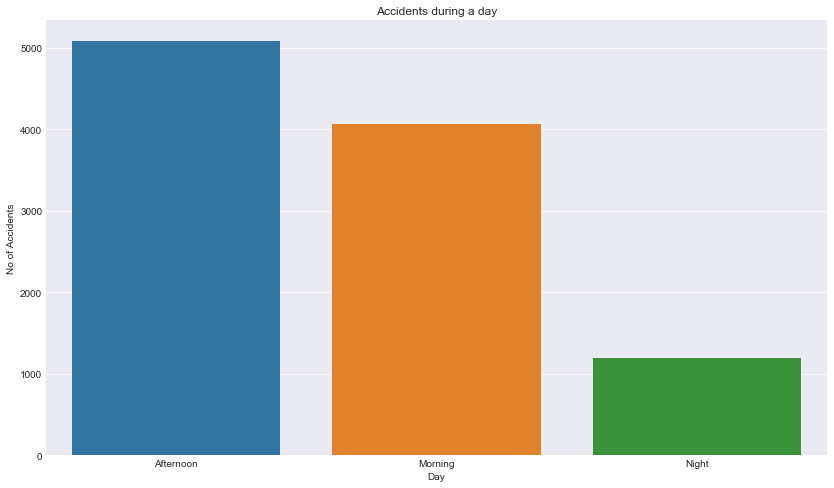

In [56]:
#plotting the graph between part_of_day vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents during a day')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Part of the day", data=Dist_part_day.sort_values(by=['Part of the day'],ascending=False))
fig.set(xlabel='Day', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during peak time(office hours) ie. during Morning. 

In [57]:
# to determine the number of accident that happened during which week of the month

Dist_weekday=df['Weekday'].value_counts().reset_index()
Dist_weekday

index  Weekday
0     Friday     1761
1    Tuesday     1691
2   Thursday     1677
3  Wednesday     1650
4     Monday     1510
5   Saturday     1155
6     Sunday      895

[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Week')]

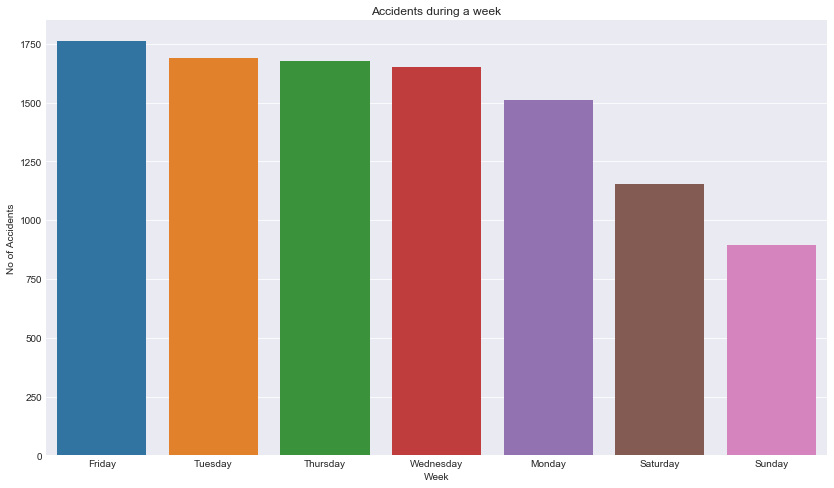

In [58]:
#plotting the graph between week vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents during a week')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Weekday", data=Dist_weekday.sort_values(by=['Weekday'],ascending=False))
fig.set(xlabel='Week', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during Friday. We could also say that it is due to 
    the start of the weekend that leads to reckless driving of the drivers.

In [59]:
# to determine the number of accident that happened during which month of the year
Dist_month=df['Month'].value_counts().reset_index()
Dist_month

index  Month
0    November    991
1         May    963
2       March    935
3     October    928
4        July    918
5        June    908
6       April    845
7     January    844
8    February    824
9   September    769
10   December    762
11     August    652

[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Month')]

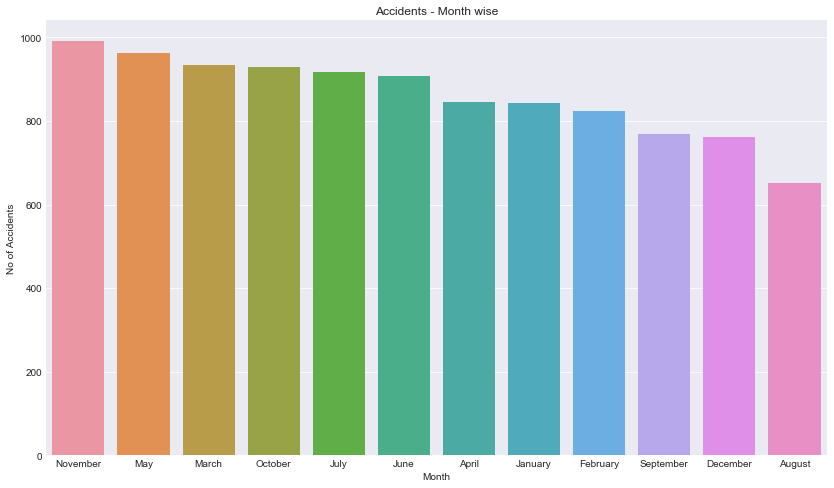

In [60]:
#plotting the graph between month vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents - Month wise')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Month", data=Dist_month.sort_values(by=['Month'],ascending=False))
fig.set(xlabel='Month', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during November. We could also say that it is due to 
    the start of the thanksgiving holidays and the approaching christmas and new year that leads to reckless driving 
    of the drivers.

In [61]:
# to determine the number of accident that happened during which part of the day
Dist_hour=df['Hour'].value_counts().reset_index()
Dist_hour

index  Hour
0      14   738
1      13   719
2      18   675
3      15   666
4      19   648
5      16   645
6       9   642
7      17   638
8      12   624
9       8   610
10     20   583
11     11   505
12     10   495
13     21   489
14     22   353
15      7   308
16     23   207
17      0   185
18      6   164
19      1   134
20      5    92
21      4    82
22      2    81
23      3    56

[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Hour')]

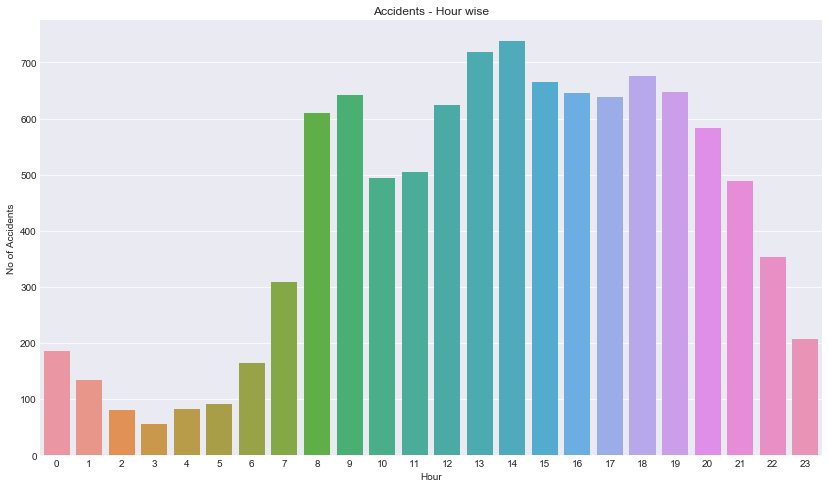

In [62]:
#plotting the graph between part_of_day vs Number of Accidents

plt.figure(figsize=(14,8))
plt.title('Accidents - Hour wise')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Hour", data=Dist_hour.sort_values(by=['Hour'],ascending=False))
fig.set(xlabel='Hour', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during peak time(office hours) when the office hours gets over. 

In [63]:
# to determine the number of mild and serious injuries that happened during which part of the day
Dist_injury_day=df[['Part of the day','Mild injuries','Serious injuries']].groupby(['Part of the day']).sum().reset_index()
Dist_injury_day

Part of the day  Mild injuries  Serious injuries
0       Afternoon           5969               120
1         Morning           4627                79
2           Night           1337                42

[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Day')]

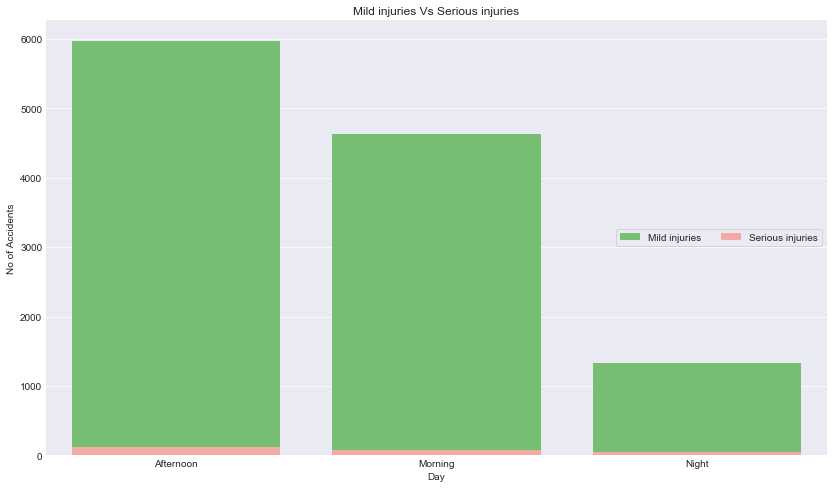

In [64]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents
f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Part of the day", y="Mild injuries", data=Dist_injury_day,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="Part of the day", y="Serious injuries", data=Dist_injury_day,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Day', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries. 

In [65]:
# to determine the number of mild and serious injuries that happened during which part of the week
Dist_injury_week=df[['Weekday','Mild injuries','Serious injuries']].groupby(['Weekday']).sum().reset_index()
Dist_injury_week

Weekday  Mild injuries  Serious injuries
0     Friday           1984                44
1     Monday           1725                27
2   Saturday           1414                33
3     Sunday           1047                39
4   Thursday           1946                33
5    Tuesday           1946                34
6  Wednesday           1871                31

[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Week')]

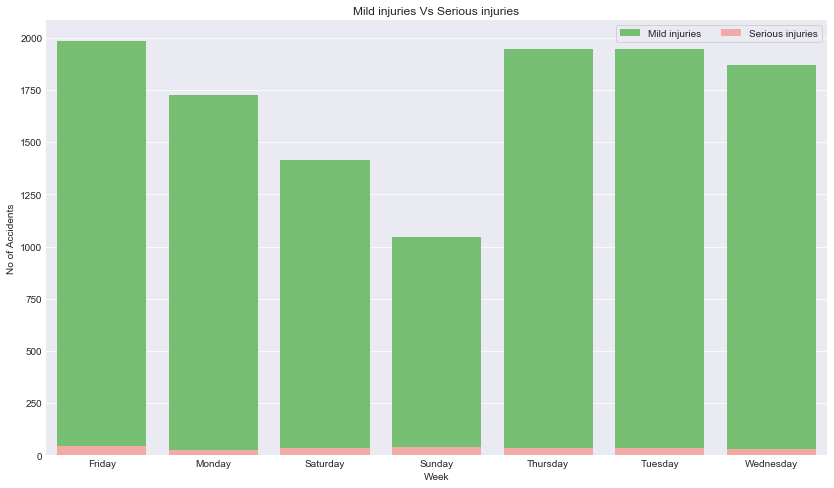

In [66]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents

f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Weekday", y="Mild injuries", data=Dist_injury_week,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid') 
fig=sns.barplot(x="Weekday", y="Serious injuries", data=Dist_injury_week,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Week', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries.

In [67]:
# to determine the number of mild and serious injuries that happened during which part of the year

Dist_injury_month=df[['Month','Mild injuries','Serious injuries']].groupby(['Month']).sum().reset_index()
Dist_injury_month

Month  Mild injuries  Serious injuries
0       April            912                23
1      August            793                10
2    December            883                13
3    February            925                17
4     January            975                14
5        July           1079                22
6        June           1067                20
7       March           1071                15
8         May           1063                28
9    November           1172                38
10    October           1053                24
11  September            940                17

[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Month')]

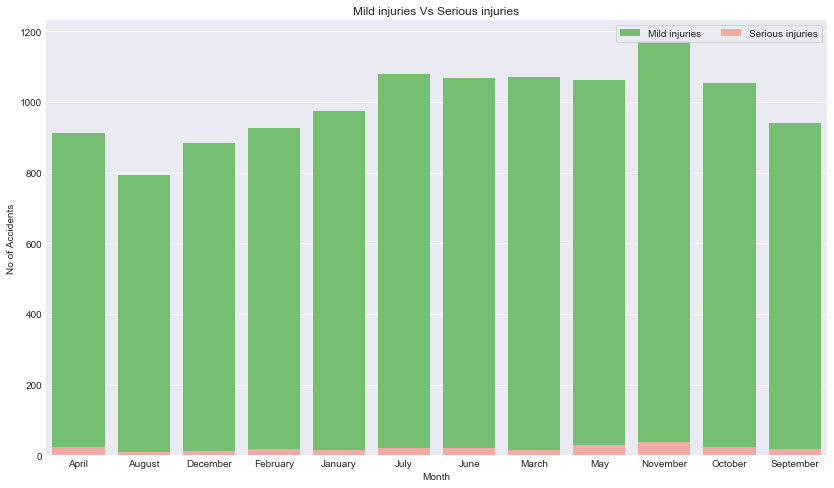

In [68]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents

f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Month", y="Mild injuries", data=Dist_injury_month,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="Month", y="Serious injuries", data=Dist_injury_month,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Month', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries.

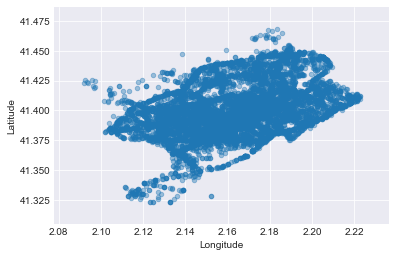

In [69]:
#plotting a scatter plot for lattitude vs Longitude
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

## Observation
    Here we could observe that more number of accidents has occured in the places ranging from Latitude: 41.37 - 41.42
    and longitude: 2.1 - 2.2

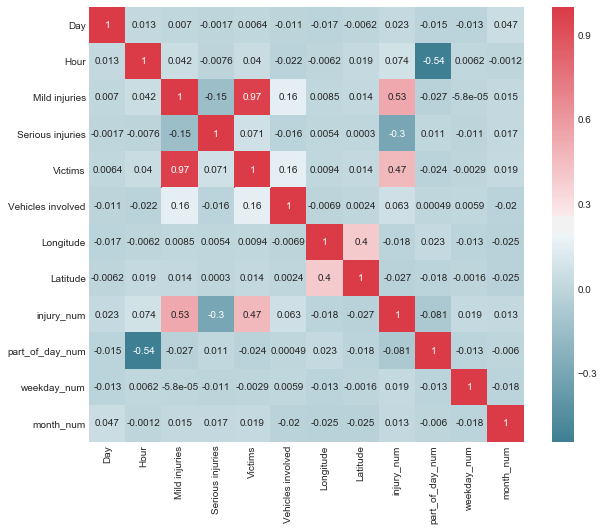

In [70]:
#creating a heat map for the entire dataset to depict the relation and association between the features.
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot= True)

# Partitioning
    Before applying the classifiers on the data we must first partition the dataset in the ratio 20:80, providing 20% to testing data and the rest 80% to training data. Finally we are going to classify whether the injury to the person during the accident is mild or serious. 

In [138]:
df = df.loc[:, ~df.columns.isin(['Id','District Name','Neighborhood Name','Street','Weekday','Month','Part of the day','Mild injuries','Serious injuries','Longitude','Latitude'])]

X2 = df.iloc[:,df.columns != 'injury_num']

T = df.iloc[:,df.columns == 'injury_num']

X2 = X2.values
T = T.values

In [139]:
Xlst, Tlst = partition(pd.DataFrame(X2), pd.DataFrame(T))

Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ytrain, Ytest = [tt.as_matrix() for tt in Tlst]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [140]:
Xtrain.shape

(8271, 7)

In [141]:
Ytrain.shape

(8271, 1)

In [142]:
Xtest.shape

(2068, 7)

In [143]:
Ytest.shape

(2068, 1)

This NeuralNetLogReg class is the main class, to implement Non linear Logistic Regression. 
    
    The NeuralNet variable is "nunits": the number of inputs, hidden units, and outputs

        Methods
            1. __init__: update/initiate weights
            2. forward: forward processing of neural network
            3. train: train the neural network
            4. use: appply the trained network for prediction

        Attributes
            1. _nLayers: the number of hidden unit layers 
            2. rho: learning rate
            3. _W: weights
            4. _weights: weights in one dimension (_W is referencing _weight)
            5. stdX: standardization class for data
            6. stdT: standardization class for target

In [144]:
from nn import NeuralNet
#import tensorflow as tf
from util import Standardizer

In [145]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [0.1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        self.stdX = None
        self.stdT = None
        self.stdTarget = True
        for i in range(self._nLayers):
            #print("nunits[",i,"]= " , nunits[i])
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc
            
        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end
            
        self.error1 = []   
        

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t)
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                if not isinstance(t, np.ndarray):
                    z = np.asarray(t)
                    f = np.exp(z) 
                    t = f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
              
        return (t, Z)

    def _objectf(self, T, Y, wpenalty):
        E = 0.5 * np.mean(np.square(T - Y)) + wpenalty
        self.error1.append(E) 
        return E

    def train(self, X, T, **params):
        NeuralNet.train(self, X, T, **params)
        pass
       
    def use(self, X,retZ=True):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        classes = np.argmax(Y,axis = 1)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        return classes,Y,self.error1

In [146]:
nn = NeuralNetLogReg([7,5,2])
nn.train(Xtrain,Ytrain)
c,Y,e = nn.use(Xtest)

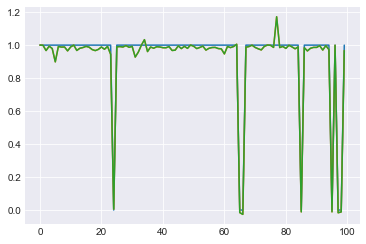

In [147]:
#Plotting without classes (getting approximate values)
plt.figure()
plt.plot(Ytest[:100])
plt.plot(Y[:100])

In [148]:
from sklearn.metrics import accuracy_score
k = accuracy_score(Ytest,c)
from sklearn.metrics import average_precision_score
p = average_precision_score(Ytest, c)
print("Precision of the model =", p)

Precision of the model = 0.8985987871718657


Acuracy of the test set = 86.36363636363636 %


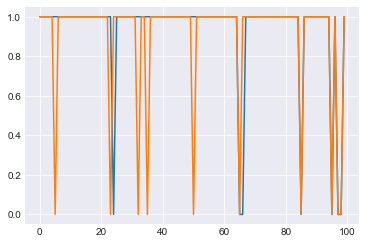

In [149]:
#plotting with classes (binary values) 
plt.clf()
p1 = Ytest[0:100]
p2 = c[0:100]
plt.plot(p1)
plt.plot(p2)
print('Acuracy of the test set =',k*100,"%")

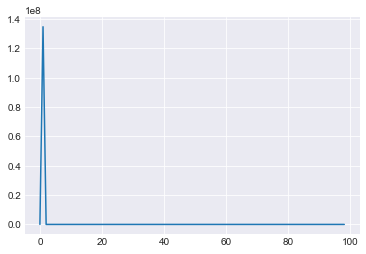

In [150]:
#error plot
plt.plot(e[1:100])

Below is the plot for Training data, Testing Data and the Model

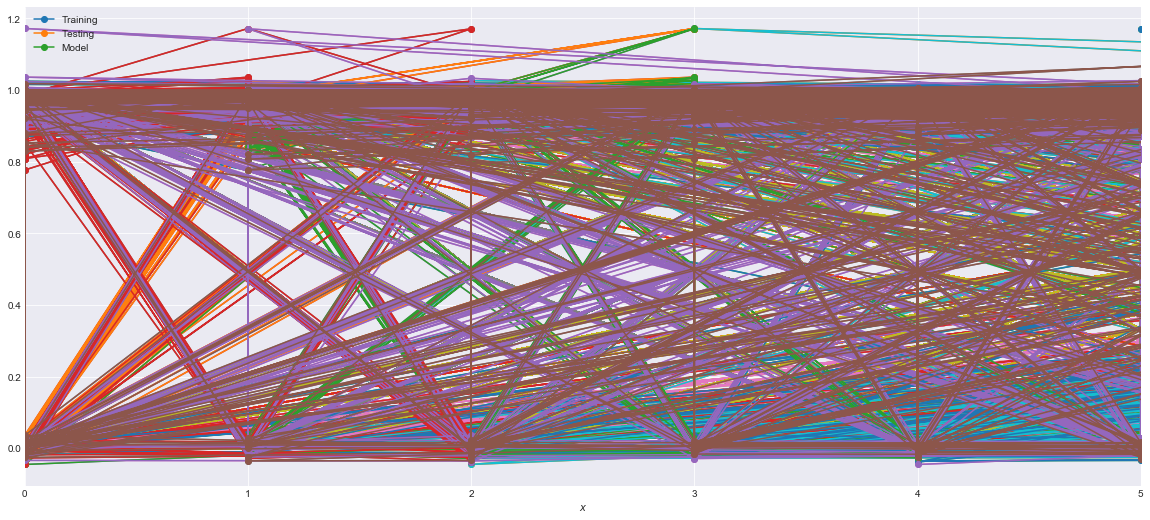

In [151]:
import IPython.display as ipd
nReps = 2
errorx = np.array(e)
fig = plt.figure(figsize=(20,30))
for reps in range(nReps):   
        plt.subplot(3,1,1)
        plt.plot(Xtrain[:20],Ytrain[:20],'o-')
        plt.plot(Xtrain,Ytrain,'o-',Xtest,Ytest,'o-',Xtest,Y,'o-')
        plt.xlim(0,5)
        plt.legend(('Training','Testing','Model'),loc='upper left')
        plt.xlabel('$x$')
        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

Below is the precise plot for training set

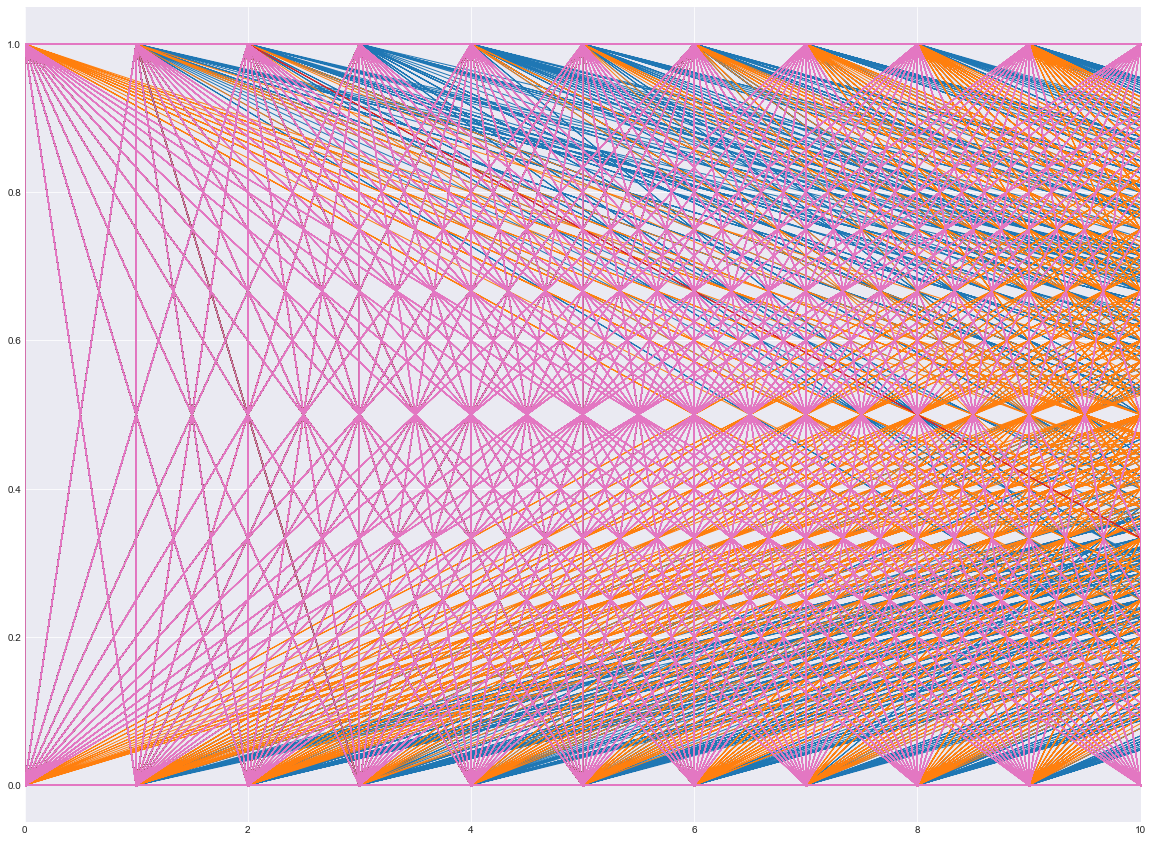

In [152]:
plt.figure(figsize=(20,15))
plt.xlim(0,10)
plt.plot(Xtrain,Ytrain, marker='o', linewidth=1, markersize=1)

Below is the precise plot for test set

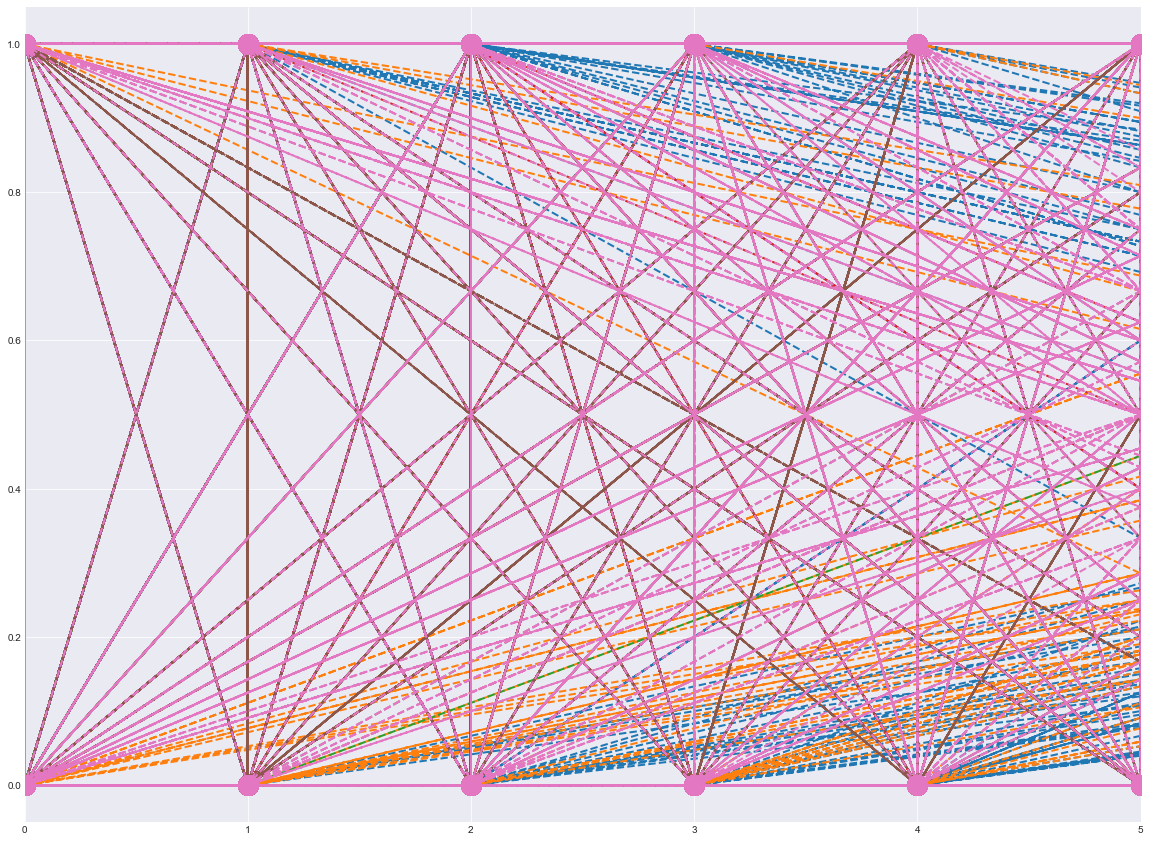

In [153]:
plt.figure(figsize=(20,15))
plt.xlim(0,5)
plt.plot(Xtest, Ytest, marker='o', linestyle='dashed',
        linewidth=2, markersize=20)

# KFold Cross Validation

        Here we are having 5 folds and finding the average among them and finally printing the accuracy.

In [154]:
df_temp = df[0:10330]
A = df_temp.iloc[:,[0,1,2,3,4,5,6,7]].as_matrix()
A.shape

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(10330, 8)

In [155]:
k_fold = 5
result, final = [],[]
p = [[7,1,2],[7,3,2],[7,4,2],[7,6,2],[7,8,4]]
P = np.split(A,5)

In [156]:
P[0].shape

(2066, 8)

In [157]:
from sklearn.metrics import accuracy_score
for i in range(k_fold):
    result = []
    test = P[i]
    for j in range(k_fold):
        if(i !=j):
            val = P[j]
            train = [x for k, x in enumerate(P) if (k !=j and k !=i)]
            train = np.concatenate((train[0], train[1], train[2]), axis =0)
            
            for z in range(len(p)):
                cn = p[z]
                testPI = i 
                valPI = j
                
                clfNonlinear = NeuralNetLogReg(cn)
                
                X_train = train[:,[0,1,2,3,5,6,7]]
                T_train = train[:,[4]]
                
                X_val = val[:,[0,1,2,3,5,6,7]]
                T_val = val[:,[4]]
                
                clfNonlinear.train(X_train, T_train, wprecision=1e-20, fprecision = 1e-2)
                c1,predicted_y,e1 = clfNonlinear.use(X_val)
                acc = accuracy_score(c1,T_val)
                result.append([acc,cn,testPI, valPI])
               
    X_test = test[:,[0,1,2,3,5,6,7]]
    T_test = test[:,[4]]
    
    result = np.array(result, dtype = object)
    NonlinearI = np.argmax(result[:,0])
    Nonlinear_Network = result[NonlinearI,1]
    Nonlinear_Test = result[NonlinearI, 2]
    Nonlinear_Val = result[NonlinearI, 3]
    
                
final = np.array(result, dtype = object)

print(final)

[[0.4961277831558567 list([7, 1, 2]) 4 0]
 [0.617134559535334 list([7, 3, 2]) 4 0]
 [0.8973862536302033 list([7, 4, 2]) 4 0]
 [0.10261374636979671 list([7, 6, 2]) 4 0]
 [0.45982575024201355 list([7, 8, 4]) 4 0]
 [0.10987415295256535 list([7, 1, 2]) 4 1]
 [0.7366892545982575 list([7, 3, 2]) 4 1]
 [0.10987415295256535 list([7, 4, 2]) 4 1]
 [0.024685382381413358 list([7, 6, 2]) 4 1]
 [0.27541142303969024 list([7, 8, 4]) 4 1]
 [0.648596321393998 list([7, 1, 2]) 4 2]
 [0.846079380445305 list([7, 3, 2]) 4 2]
 [0.9036786060019361 list([7, 4, 2]) 4 2]
 [0.5667957405614714 list([7, 6, 2]) 4 2]
 [0.0 list([7, 8, 4]) 4 2]
 [0.1021297192642788 list([7, 1, 2]) 4 3]
 [0.8978702807357212 list([7, 3, 2]) 4 3]
 [0.8978702807357212 list([7, 4, 2]) 4 3]
 [0.9845111326234269 list([7, 6, 2]) 4 3]
 [0.8915779283639884 list([7, 8, 4]) 4 3]]


# Examination of Non Linear Logistic Regression using Toy Data

Text(0.5,1,'test data set')

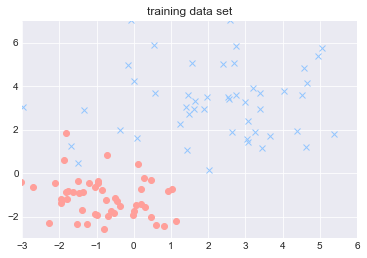

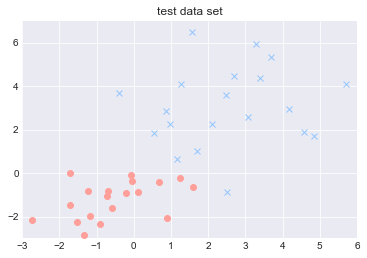

In [158]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [159]:
# Apply Nonlinear Logistic Regression
from imp import reload

clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y,e = clsf.use(Xtest)

Accuracy:  95.78232166670736 %


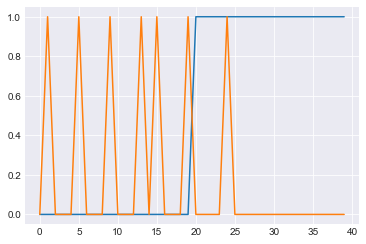

In [160]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

# Result
        NonLinear Logistic Regression: 64.12 %
        NonLinear Regression         : 44.24 % 
            As we have seen in the CV errors above on both the tested models, NonLinear Logistic Regression has the far more better accuracy of 64.12 % than NonLinear Regression with 44.2 % accuracy
       
       The Visualisation of results of both models has been plotted above so that's why Iam not repeating it here again.
        

# Conclusion        
        The challenging part was in understanding the matematical equations and converting them into codes. Neural Networks was much more challenging than other assignments and interesting too. Maintaining shapes of the data was another challenging task.
                Hence I have learnt how Neural Networks works.

# References
    1. https://stats.stackexchange.com/questions/51200/pocket-algorithm-for-training-perceptrons
    2. https://classeval.wordpress.com/introduction/basic-evaluation-measures/
    3. http://mathworld.wolfram.com/LeastSquaresFitting.html
    4. https://svivek.com/teaching/machine-learning/fall2018/slides/linear-models/lms-regression.pdf
    5. https://www.mathsisfun.com/data/least-squares-regression.html
    6. https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb
    7. https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-Neural%20Networks.ipynb

    